In [1]:
import pandas as pd
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='dark', color_codes=False)  # 绘图风格设置
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# 单变量线性回归

In [2]:
data=pd.read_csv('ex1data1.txt',engine='python',names=['population','profit'])#读取文件 
#相对路径必须要加.txt后缀，血泪教训#
data.head()# 读取前五行数据

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.tail()# 读取后五行数据

,population,profit
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510
96,5.4369,0.61705


In [4]:
data.describe()#当前数据的介绍

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [5]:
data.info()# 对数据类型做归一化处理,转为DataFrame格式

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  97 non-null     float64
 1   profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


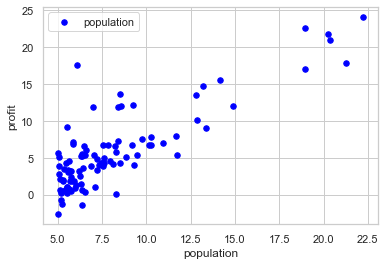

In [6]:
data.plot.scatter('population','profit',c='b',label='population',s=30)
# 人口，利润，颜色，标签，散点大小 # scatter散点图 plot曲线
plt.show()

In [7]:
data.insert(0, 'ones', 1)
#1. loc: 插入的列索引
#2. column: 插入列的标签,字符串
#3. value ：插入列的值
data.head()

,ones,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [8]:
X = data.iloc[:,0:-1]#切片取第一列到倒数第二列构建数据集X
X.head()

,ones,population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


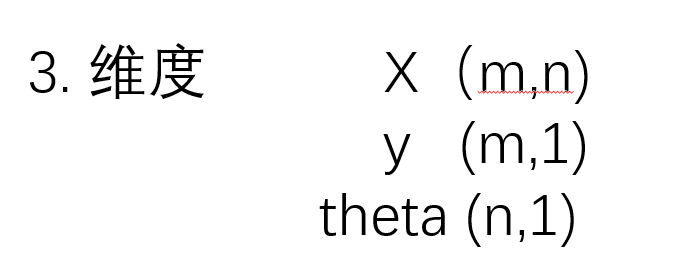

In [9]:
y=data.iloc[:,-1]#切片取倒数第二列到倒数第一列构建标签y
y.head()

0    17.5920
1     9.1302
2    13.6620
3    11.8540
4     6.8233
Name: profit, dtype: float64

In [10]:
X=X.values#将DataFrame格式转换为数组/矩阵
X.shape#检查维度

(97, 2)

In [11]:
y=y.values#将DataFrame格式转换为数组/矩阵
y.shape

(97,)

In [12]:
y=y.reshape(97,1)#将y转化为二维数组，便于后续运算
y.shape

(97, 1)

In [37]:
def costFunction(X,y,theta):#代价函数,注意冒号 
    inner = np.power(X @ theta - y,2)#np.power(num,幂次)，@--矩阵相乘，计算内层 
    return np.sum(inner) / (2*len(X))#len()获取长度，对应m ，返回J（theta）

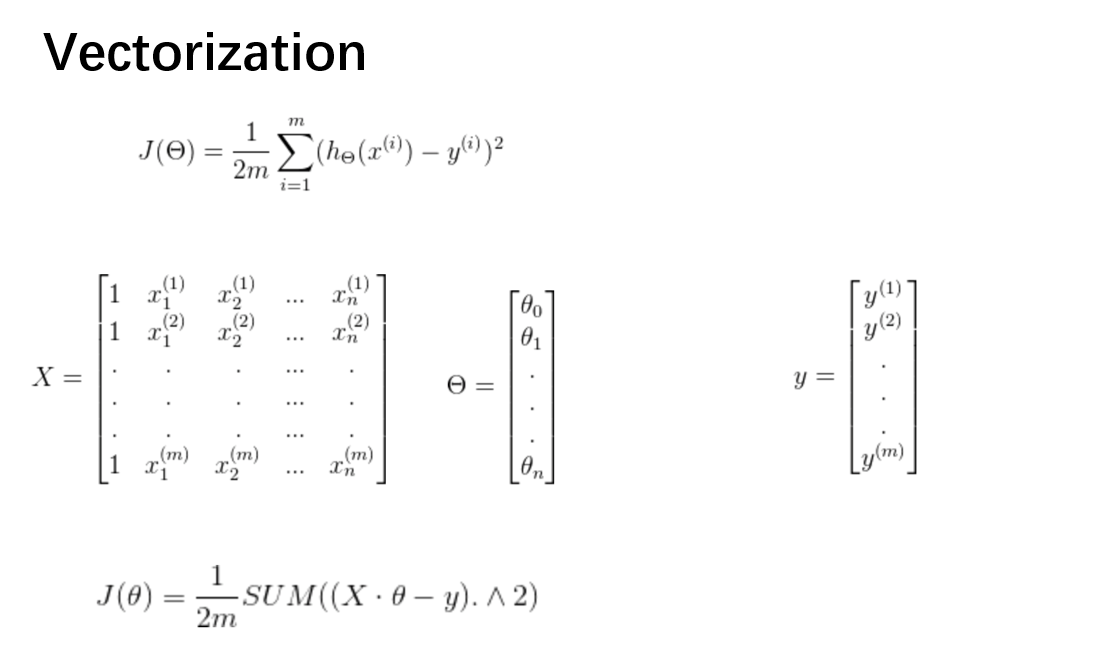

In [38]:
theta=np.zeros((2,1))#创建（2，1）全0矩阵，保证X @ theta与y的维度相同
theta.shape

(2, 1)

In [52]:
cost_init=costFunction(X,y,theta)#测试一下效果
print(cost_init)

4.476972141289018


In [40]:
def gradientDescent(X,y,theta,alpha,iters):#梯度降落函数
    costs=[] #建立cost元组获取每次迭代时J（theta）的参数
    
    for i in range(iters):
        theta = theta - (X.T @ (X @ theta - y)) * alpha / len(X) #X.T--X的转置，
        cost = costFunction(X,y,theta) #调用costFunction函数获取每次迭代时J（theta）的值
        costs.append(cost) #append函数会在数组后加上相应的元素,costs组存cost的值
        
        if i% 100 ==0:# 每迭代100次打印一个值
            print(cost)
            
    return theta,costs

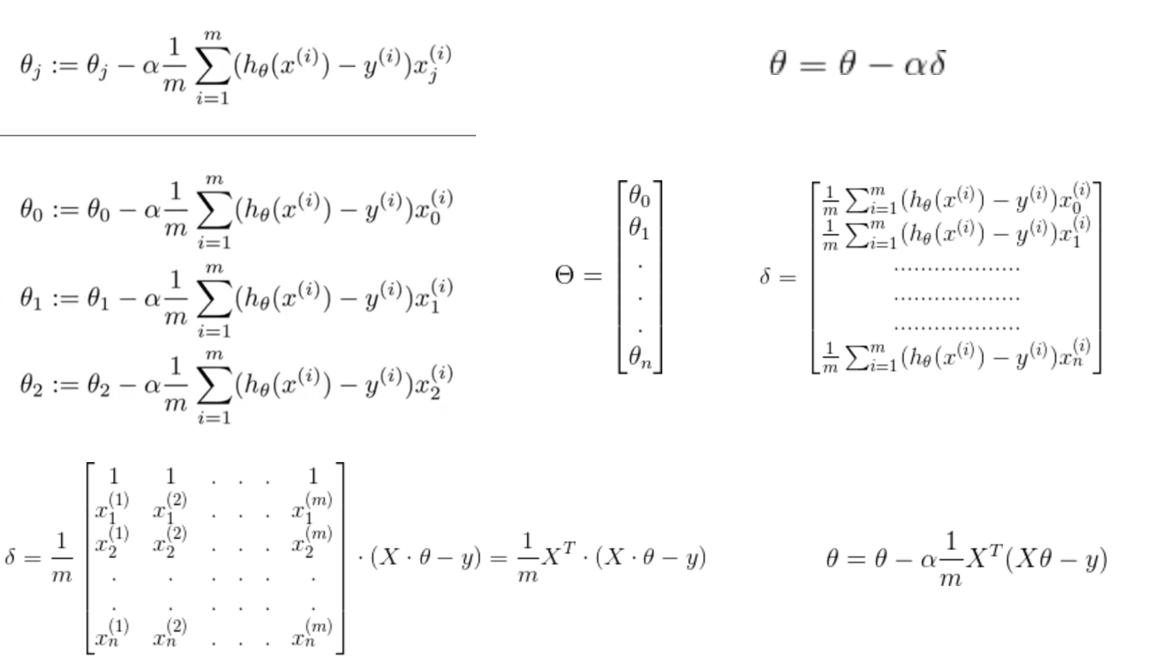

In [41]:
alpha=0.02#学习率
iters=2000 #迭代次数

theta,costs=gradientDescent(X,y,theta,alpha,iters)

16.76964237166745
5.170668092303259
4.813840215803055
4.640559602034057
4.556412109403549
4.515548908598865
4.495705166048674
4.486068766778817
4.481389196347322
4.479116731414092
4.478013190619409
4.477477295755764
4.477217057705422
4.477090682463859
4.477029312876824
4.476999510945953
4.476985038710984
4.476978010791016
4.476974597934661
4.476972940603823


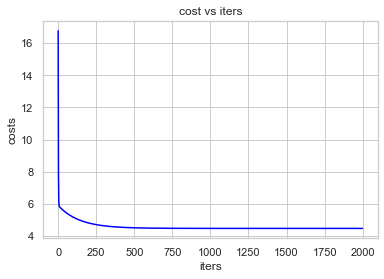

In [42]:
#fig,ax = plt.subplots() 初始化，ax索引相当于图片的整个属性，直接对其修改即可
#ax1=ax[0,0].plot()  类似matlab的subplots，但是用ax数组代表不同行列
#ax.plot(np.arange(iters),costs,'b’)   #列表 b color


fig,ax = plt.subplots() #损失函数迭代可视化
ax.plot(np.arange(iters),costs,'b')   #列表
ax.set(xlabel='iters',ylabel='costs',title='cost vs iters')
plt.show()

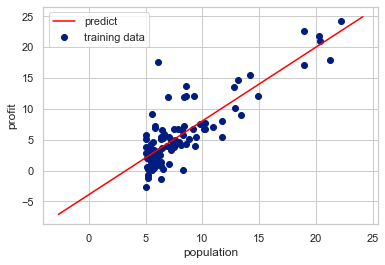

In [51]:
x = np.linspace(y.min(),y.max(),100)#取从ymin到ymax的100个点
y_ = theta[0,0]+theta[1,0]* x  #theta[0,0]--theta0,theta[1,0]--theta1,构建拟合函数

fig,ax = plt.subplots() #拟合函数可视化
ax.scatter(X[:,-1],y,label='training data')#取X数据集中population绘制散点图,由于之前加入ones列，此处直接取-1即最后一列
ax.plot(x,y_,'r',label='predict')
ax.legend()#两个标签同时显示
ax.set(xlabel='population',ylabel='profit')
plt.show()